In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
#read in files - full dataset - no reduced columns 
file_name = 'data/application_clean.csv'
df = pd.read_csv(file_name)

file_name = 'data/application_clean_test.csv'
df_test = pd.read_csv(file_name)

df.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

print(df.shape)
print(df_test.shape)

In [75]:

#read in files - full dataset - no reduced columns 
file_name = 'data/REDUCED_application_clean.csv'
df = pd.read_csv(file_name)

file_name = 'data/REDUCED_application_clean_test.csv'
df_test = pd.read_csv(file_name)

df.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

print(df.shape)
print(df_test.shape)

(307511, 52)
(48744, 51)


In [76]:
#call function to preprocess data
df_s, df_s_test = preprocess(df, df_test)
print(df_s.shape)
print(df_s_test.shape)

#call function to balance data
X_balance, y_balance = balance_data(df_s)
print('BALANCED: ' + str(X_balance.shape) + ' ' + str(y_balance.shape))



dfo SHape:
(307511, 12)
(48744, 12)

df_s SHape:
(307511, 40)
(48744, 39)

flags SHape:
(307511, 6)
(48744, 6)

df_s SHape (after dropping flags):
(307511, 34)
(48744, 33)

df_s SHape - after dropping SK_ID_CURR:
(307511, 33)
(48744, 32)

df_s SHape - after dropping target:
(307511, 32)
(48744, 32)

AFTER imputing: 
(307511, 32)
(48744, 32)

df_scaled SHape - after scaling:
(307511, 32)
(48744, 32)

df_scaled SHape - after adding ID:
(307511, 33)
(48744, 33)

df_scaled SHape - after adding dfo:
(307511, 154)
(48744, 154)

df_scaled SHape - after adding flags:
(307511, 160)
(48744, 160)

df_scaled SHape - after adding TARGET:
(307511, 161)
(48744, 160)

(307511, 52)
(48744, 51)
TARGET values before undersampling: 
0    282686
1     24825
Name: TARGET, dtype: int64
BALANCED: (49650, 160) (49650,)


In [79]:
#GB with reduced columns 
cnf_matrix, ac_train, ac_val, accuracy, classification_report = GB_model(X_balance, y_balance)

print('Classification Report: ')
print(classification_report)

print('Confusion Matrix:')
print(cnf_matrix)

print("Accuracy score (training): {0:.3f}".format(ac_train))
print("Accuracy score (validation): {0:.3f}".format(ac_val))
print("Accuracy: {}".format(accuracy))

Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      7391
           1       0.60      0.61      0.60      7504

    accuracy                           0.60     14895
   macro avg       0.60      0.60      0.60     14895
weighted avg       0.60      0.60      0.60     14895

Confusion Matrix:
[[4384 2958]
 [3007 4546]]
Accuracy score (training): 0.605
Accuracy score (validation): 0.600
Accuracy: 0.6


Training Shape: (34755, 242)
Testing Shape: (14895, 242)
Random Forest: Accuracy=0.689
Random Forest: f1-score=0.689
Confusion Matrix:
[[5214 2128]
 [2500 5053]]
30


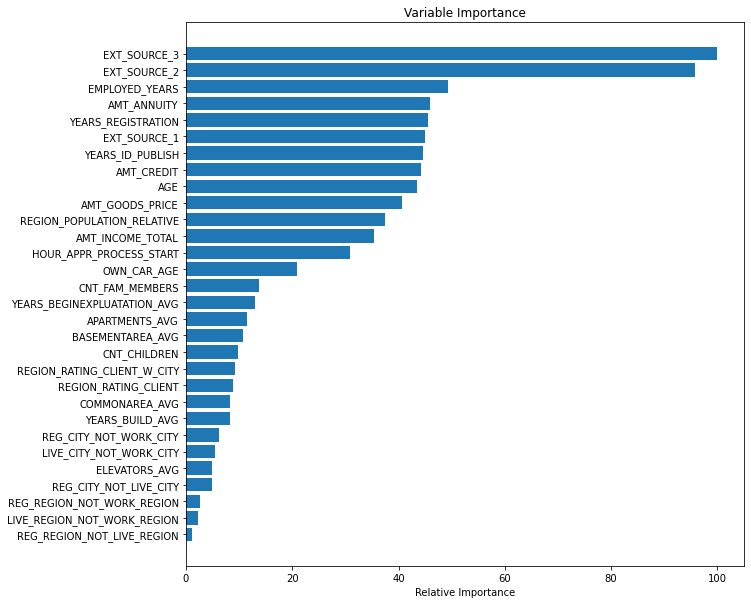

In [46]:
RF_model(X_balance, y_balance)

In [37]:
def balance_data(df):
    #under sample imbalanced data - reduce rows with TARGET=0
    from imblearn.under_sampling import RandomUnderSampler

    df_train = df    
    print('TARGET values before undersampling: ')
    print(df_train.TARGET.value_counts())

    X = df_train.drop('TARGET', axis = 1)
    y = df_train['TARGET']

    rus = RandomUnderSampler()
    X_rus, y_rus = rus.fit_resample(X, y)
    
    #from imblearn.combine import SMOTEENN
    #smote_enn = SMOTEENN(random_state=0)
    #X_resampled, y_resampled = smote_enn.fit_resample(X, y)
    #print(sorted(Counter(y_resampled).items()))
    
    #from imblearn.combine import SMOTETomek
    #smote_tomek = SMOTETomek(random_state=0)
    #X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
    #print(sorted(Counter(y_resampled).items()))
    
    return X_rus, y_rus
    #print('Removed indexes:', id_rus)

    #plot_2d_space(X_rus, y_rus, 'Random under-sampling')


under-sampling:
1    24825
0    24825
Name: TARGET, dtype: int64


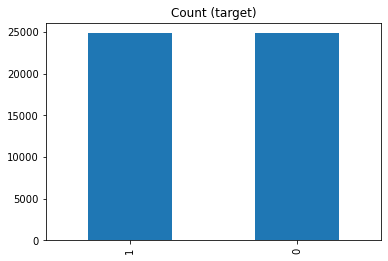

In [282]:
    df_train = df_scaled
    
    count_class_0, count_class_1 = df_train.TARGET.value_counts()

    df_class_0 = df_train[df_train['TARGET'] == 0]
    df_class_1 = df_train[df_train['TARGET'] == 1]

    df_class_0_under = df_class_0.sample(count_class_1)
    df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

    print('under-sampling:')
    print(df_test_under.TARGET.value_counts())

    df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (target)');

## Random Forest Classifier

In [45]:
def RF_model(X, y):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    print("Training Shape: " + str(X_train.shape))
    print("Testing Shape: " + str(X_test.shape))
    random_forest = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)
    model = random_forest.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    lr_probs = y_pred_prob[:,1]
    #ac = accuracy_score(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print('Random Forest: Accuracy=%.3f' % (ac))
    print('Random Forest: f1-score=%.3f' % (f1))
    print('Confusion Matrix:')
    print(cm)
    
    feature_importance = random_forest.feature_importances_

    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
    sorted_idx = np.argsort(feature_importance)[:30]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

## Gardient Boosting Classifier

In [57]:
def best_params(X, y):
    %matplotlib inline
    from sklearn import preprocessing
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    
    gb = GradientBoostingClassifier()
    parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[3,5,7],
    "learning_rate":[1,10,50]
    }
    
    from sklearn.model_selection import GridSearchCV
    cv = GridSearchCV(gb,parameters,cv=5)
    cv.fit(X_train, y_train.values.ravel())
    
    print(cv.best_params_)
   
    #learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
    #for learning_rate in learning_rates:
     #   gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
      #  gb.fit(X_train, y_train)
       # print("Learning rate: ", learning_rate)
        #print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
        #print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
        #print()


In [78]:
def GB_model(X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    gb_model = GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_features=5, max_depth=3, random_state=0)
    gb_model.fit(X_train, y_train)

    y_pred = gb_model.predict(X_test)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    #print('Confusion Matrix')
    ac_train = gb_model.score(X_train, y_train)
    ac_val = gb_model.score(X_test, y_test)
    accuracy = round((y_pred==y_test).sum()/len(y_pred),3)
    return(cnf_matrix, ac_train, ac_val, accuracy, classification_report(y_pred, y_test))

    #print(classification_report(y_pred, y_test))

    #print("Accuracy score (training): {0:.3f}".format(gb_model.score(X_train, y_train)))
    #print("Accuracy score (validation): {0:.3f}".format(gb_model.score(X_test, y_test)))
    #print("Accuracy: {}".format(round((y_pred==y_test).sum()/len(y_pred),3)))

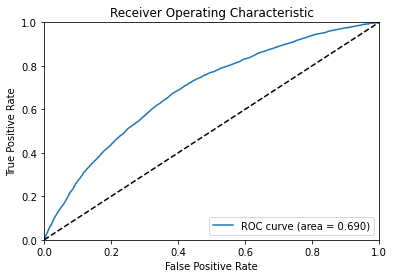

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

y_true = y_test # ground truth labels
y_probas = gb_model.predict_proba(X_test)  # predicted probabilities generated by sklearn classifier
probs = y_probas[:,1]
# Calculate fpr, tpr, thresholds and roc_auc
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:
def preprocess(df, df_test):
    
    #create dataframe to hold all features that are categories (datatype object)
    dfo=df.select_dtypes(include=['object']) # select object type columns
    dfo_test =  df_test.select_dtypes(include=['object'])
    #df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
    #dfo = pd.get_dummies(dfo)
    print('dfo SHape:')
    print(dfo.shape)
    print(dfo_test.shape)
    print('') 
    
    #create a dataframe to hold only numeric values - this dataset will be used to impute the mean and scale the data
    df_s = df.drop(dfo, axis=1)
    df_s_test = df_test.drop(dfo_test, axis=1)
    print('df_s SHape:')
    print(df_s.shape)
    print(df_s_test.shape)
    print('')
    
    #create new dataframe to hold flag columns  
    col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL']
    flags = df_s[col]
    flags_test = df_s_test[col]
    print('flags SHape:')
    print(flags.shape)
    print(flags_test.shape)
    print('')

    #drop flag columns from df_s and df_s_ testsince they don't need to be scaled
    df_s = df_s.drop(col, axis=1)
    df_s_test = df_s_test.drop(col, axis=1)
    print('df_s SHape (after dropping flags):')
    print(df_s.shape)
    print(df_s_test.shape)
    print('')

    ID = df_s['SK_ID_CURR']
    ID_test = df_s_test['SK_ID_CURR']

    df_s.drop(columns=['SK_ID_CURR'], inplace=True)
    df_s_test.drop(columns=['SK_ID_CURR'], inplace=True)
    print('df_s SHape - after dropping SK_ID_CURR:')
    print(df_s.shape)
    print(df_s_test.shape)
    print('')
    
    #remove 'TARGET' cloumn from dataframe while scaling and imputing in order to avoid data leakage 
    target = df_s['TARGET']
    df_s.drop(columns=['TARGET'], inplace=True)
    print('df_s SHape - after dropping target:')
    print(df_s.shape)
    print(df_s_test.shape)
    print('')    
    
    #store column names so we can use them to convert array to dataframe
    names = df_s.columns
    names_test = df_s_test.columns
    
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    scaled = imputer.fit_transform(df_s)
    scaled_test = imputer.transform(df_s_test)

    print('AFTER imputing: ')
    df_s = pd.DataFrame(scaled, columns = names)
    print(df_s.shape)

    df_s_test = pd.DataFrame(scaled_test, columns = names)
    print(df_s_test.shape)
    print('')
    
    from sklearn.preprocessing import MinMaxScaler

    # define min max scaler
    scaler = MinMaxScaler()

    # transform data
    scaled = scaler.fit_transform(df_s)
    scaled_test = scaler.transform(df_s_test)

    #convert array to dataframe
    df_scaled = pd.DataFrame(scaled, columns=names)
    df_scaled_t = pd.DataFrame(scaled_test, columns=names)
    
    print('df_scaled SHape - after scaling:')
    print(df_scaled.shape)
    print(df_scaled_t.shape)
    print('')
    
    df_scaled['SK_ID_CURR'] = ID
    df_scaled_t['SK_ID_CURR'] = ID_test
    print('df_scaled SHape - after adding ID:')
    print(df_scaled.shape)
    print(df_scaled_t.shape)
    print('')
    
    dfo = pd.get_dummies(dfo)
    dfo_test = pd.get_dummies(dfo_test)

    dfo, dfo_test = dfo.align(dfo_test, join = 'inner', axis = 1)

    df_scaled = pd.concat([df_scaled, dfo], axis=1)
    df_scaled_t = pd.concat([df_scaled_t, dfo_test], axis=1)
    print('df_scaled SHape - after adding dfo:')
    print(df_scaled.shape)
    print(df_scaled_t.shape)
    print('')
    
    
    df_scaled = pd.concat([df_scaled, flags], axis=1)
    df_scaled_t = pd.concat([df_scaled_t, flags_test], axis=1)
    print('df_scaled SHape - after adding flags:')
    print(df_scaled.shape)
    print(df_scaled_t.shape)
    print('')
    
    df_scaled['TARGET'] = target
    print('df_scaled SHape - after adding TARGET:')
    print(df_scaled.shape)
    print(df_scaled_t.shape)
    print('')
    
    return df_scaled, df_scaled_t
    